<a href="https://colab.research.google.com/github/zmathes1/Intro-to-Machine-Learning/blob/main/Final_Project_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Zachary Matheson and Anshuman Srivastava
# 801095035 801376187
# Final Project
# https://github.com/zmathes1/Intro-to-Machine-Learning.git

import numpy as np
import pandas as pd
import readline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

from google.colab import drive
drive.mount ('/content/drive') # Fix issues connecting to file_path
file_path = '/content/drive/My Drive/Colab Notebooks/loan_data.csv'

readline.clear_history()

loan = pd.read_csv(file_path)

# Mapping
loan['Loan_Status'] = loan['Loan_Status'].map({'yes': 1, 'no': 0})
loan['Property_Area'] = loan['Property_Area'].map({'Semirural': 2, 'Rural': 1, 'Urban': 0})
loan['Self_Employed'] = loan['Self_Employed'].map({'yes': 1, 'no': 0})
loan['Education'] = loan['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan['Married'] = loan['Married'].map({'yes': 1, 'no': 0})
loan['Gender'] = loan['Gender'].map({'Male': 1, 'Female': 0})

# Cleaning dataset
loan = loan.dropna()
#Resetting index
loan.reset_index(drop=True, inplace=True)

num_elements = loan.shape[0]
print("Number of elements remaining: ", num_elements) # We lose half of the elements
loan.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of elements remaining:  185


,Loano_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1,1.0,1,0.0,4583,1508.0,128,360.0,1.0,1.0,0
1,LP001005,1.0,1,0.0,1,1.0,3000,0.0,66,360.0,1.0,0.0,1
2,LP001006,1.0,1,0.0,0,0.0,2583,2358.0,120,360.0,1.0,0.0,1
3,LP001008,1.0,0,0.0,1,0.0,6000,0.0,141,360.0,1.0,0.0,1
4,LP001013,1.0,1,0.0,0,0.0,2333,1516.0,95,360.0,1.0,0.0,1


Part 1. Using Gradient Descent

In [43]:
# Splitting the dataset into training and testing sets
np.random.seed(0)
df_train, df_test = train_test_split(loan, train_size = 0.7, test_size = 0.3, random_state = 0)

In [44]:
# Numerical variables that will be used for training
num_varsa = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status' ]

In [45]:
# Separate features and labels for training
X_train = df_train[num_varsa].values[:, :-1]
y_train = df_train['Loan_Status'].values
m_train = len(y_train)
n_train = len(X_train)


In [46]:
# Seperate features and labels for test
X_test = df_test[num_varsa].values[:, :-1]
y_test = df_test['Loan_Status'].values
#print(y_train)
m_test = len(y_test)
n_test = len(X_test)

In [47]:
# Initializing
X_0train = np.ones((m_train,1))
X_0test = np.ones((m_test,1))

X_1train = X_train.reshape(m_train, 11)
X_1test = X_test.reshape(m_test, 11)

Xtrain = np.hstack((X_0train, X_1train))
Xtest = np.hstack((X_0test, X_1test))

theta = np.zeros(12)

m = len(loan)
print(len(loan))

185


In [48]:
# Cost function
def compute_cost_train(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [49]:
# Gradient descent
def gradient_descent(X, Xtest, y, y_test, theta, alpha, iterations):
    m_train = len(y_train)
    m_test = len(y_test)
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradients = (2/m_train) * X.transpose().dot(errors)
        theta -= alpha * gradients

        train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y))
        cost_history_train[i] = train_loss

        val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
        cost_history_test[i] = val_loss

    return theta, cost_history_train, cost_history_test

In [50]:
iterations =  1000
alpha = 0.000000001 # Alpha can be 0.00000001 or less for training model to work
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain, Xtest, y_train, y_test, theta, alpha, iterations)

print("Final theta (first 10) =", theta[:10])
print("Final cost history (first 10) =", cost_history_train[:10], cost_history_test[:10])

Final theta (first 10) = [ 1.80681231e-07  1.81360851e-07  1.50017101e-07  1.44976801e-07
  1.61298017e-07 -4.74558978e-09  1.33576538e-04  1.77700979e-05
  1.84530038e-05  6.45908648e-05]
Final cost history (first 10) = [0.59545547 0.57257816 0.55138708 0.53175642 0.51356983 0.49671967
 0.48110638 0.46663788 0.45322896 0.44080085] [0.66960339 0.64454046 0.62111809 0.59922327 0.57875104 0.55960389
 0.54169124 0.52492893 0.50923874 0.49454799]


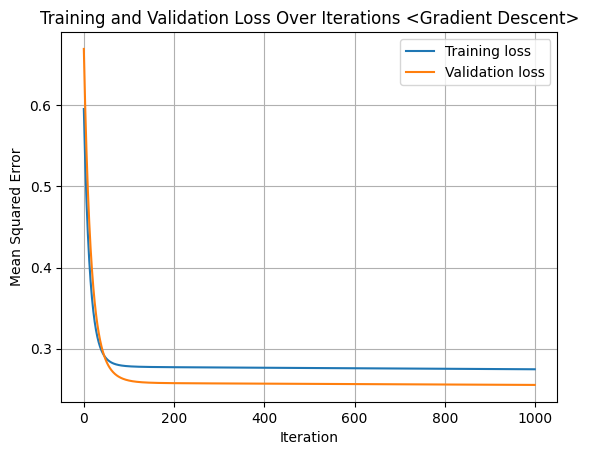

In [51]:
plt.plot(cost_history_train, label="Training loss")
plt.plot(cost_history_test, label="Validation loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.title("Training and Validation Loss Over Iterations <Gradient Descent>")
plt.show()

In [52]:
# View values of NaN
# print(loan.isnull().sum())
# print(loan)

Part 2. Using Normalization

In [53]:
scaler = MinMaxScaler()

# Numerical variables that will be used for training
num_varsa = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status' ]

df_train[num_varsa] = scaler.fit_transform(df_train[num_varsa])
df_test[num_varsa] = scaler.fit_transform(df_test[num_varsa])

In [54]:
# Separate features and labels for training
X_train1 = df_train[num_varsa].values[:, :-1]
y_train1 = df_train['Loan_Status'].values
m_train1 = len(y_train1)
n_train1 = len(X_train1)

In [55]:
# Seperate features and labels for test
X_test1 = df_test[num_varsa].values[:, :-1]
y_test1 = df_test['Loan_Status'].values
m_test1 = len(y_test1)
n_test1 = len(X_test1)

In [56]:
# Initializing
X_0train1 = np.ones((m_train1,1))
X_0test1 = np.ones((m_test1,1))

X_1train1 = X_train1.reshape(m_train1, 11)
X_1test1 = X_test1.reshape(m_test1, 11)

Xtrain1 = np.hstack((X_0train1, X_1train1))
Xtest1 = np.hstack((X_0test1, X_1test1))

theta1 = np.zeros(12)

In [57]:
iterations1 =  1000
alpha1 = 0.01 # Alpha can be 0.001 or less for training model to work
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain1, Xtest1, y_train1, y_test1, theta1, alpha1, iterations1)

print("Final theta (first 10) =", theta[:10])
print("Final cost history (first 10) =", cost_history_train[:10], cost_history_test[:10])

Final theta (first 10) = [-0.00661401  0.05297617  0.01688769  0.0149375   0.08225726 -0.02765169
  0.05109721 -0.073411    0.07024178 -0.05698494]
Final cost history (first 10) = [0.54574013 0.48477665 0.43482372 0.39388342 0.36032045 0.33279626
 0.31021525 0.29168064 0.27645841 0.26394775] [0.61492141 0.54724416 0.49097543 0.4441248  0.4050554  0.37242049
 0.34511151 0.32221539 0.30297966 0.2867838 ]


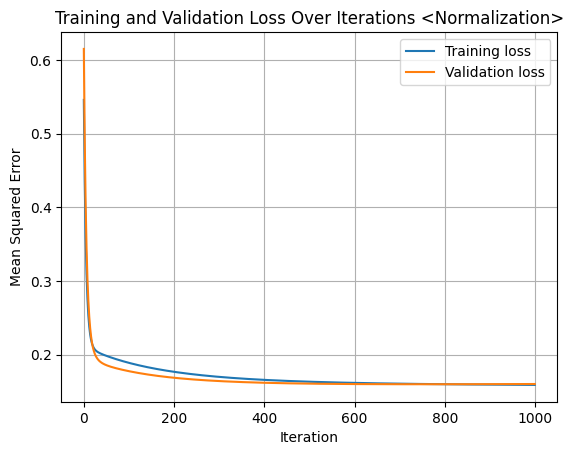

In [58]:
plt.plot(cost_history_train, label="Training loss")
plt.plot(cost_history_test, label="Validation loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.title("Training and Validation Loss Over Iterations <Normalization>")
plt.show()

Part 3. Using Standardization

In [59]:
scaler = StandardScaler()

# Numerical variables that will be used for training
num_varsa = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status' ]

df_train[num_varsa] = scaler.fit_transform(df_train[num_varsa])
df_test[num_varsa] = scaler.fit_transform(df_test[num_varsa])

In [60]:
# Separate features and labels for training
X_train2 = df_train[num_varsa].values[:, :-1]
y_train2 = df_train['Loan_Status'].values
m_train2 = len(y_train2)
n_train2 = len(X_train2)

In [61]:
# Seperate features and labels for test
X_test2 = df_test[num_varsa].values[:, :-1]
y_test2 = df_test['Loan_Status'].values
m_test2 = len(y_test2)
n_test2 = len(X_test2)

In [62]:
# Initializing
X_0train2 = np.ones((m_train2,1))
X_0test2 = np.ones((m_test2,1))

X_1train2 = X_train2.reshape(m_train2, 11)
X_1test2 = X_test2.reshape(m_test2, 11)

Xtrain2 = np.hstack((X_0train2, X_1train2))
Xtest2 = np.hstack((X_0test2, X_1test2))

theta2 = np.zeros(12)

In [63]:
iterations2 =  1000
alpha2 = 0.1 # Alpha can be 0.001 or less for training model to work
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain2, Xtest2, y_train2, y_test2, theta2, alpha2, iterations2)

print("Final theta (first 10) =", theta[:10])
print("Final cost history (first 10) =", cost_history_train[:10], cost_history_test[:10])

Final theta (first 10) = [ 9.62193288e-17  5.97825764e-02  1.25794484e-02 -1.49416140e-03
  1.08022985e-01 -2.93822048e-02  7.92485727e-03 -1.10614356e-01
  7.49016264e-02 -5.64210929e-02]
Final cost history (first 10) = [0.87324682 0.79614696 0.74820684 0.71791354 0.69853505 0.68601624
 0.67786092 0.67250783 0.6689687  0.66661201] [0.88484516 0.81686743 0.77722735 0.75485668 0.74301901 0.73753655
 0.73580082 0.73618668 0.73769131 0.73970654]


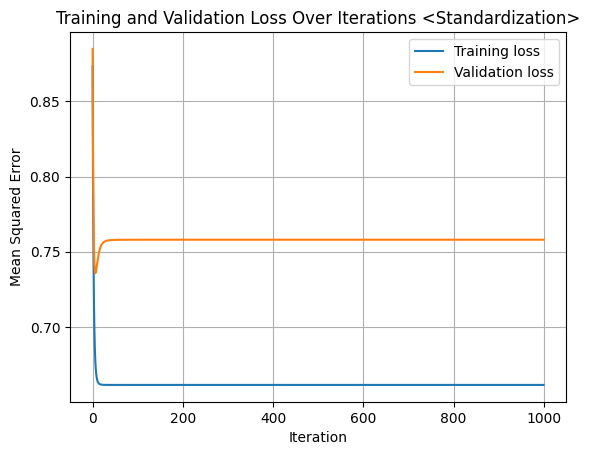

In [64]:
plt.plot(cost_history_train, label="Training loss")
plt.plot(cost_history_test, label="Validation loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.title("Training and Validation Loss Over Iterations <Standardization>")
plt.show()

Part 4. Confusion Matrix

In [65]:
# Load the dataset
loan = pd.read_csv(file_path)

# Mapping
loan['Loan_Status'] = loan['Loan_Status'].map({'yes': 1, 'no': 0})
loan['Property_Area'] = loan['Property_Area'].map({'Semirural': 2, 'Rural': 1, 'Urban': 0})
loan['Self_Employed'] = loan['Self_Employed'].map({'yes': 1, 'no': 0})
loan['Education'] = loan['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan['Married'] = loan['Married'].map({'yes': 1, 'no': 0})
loan['Gender'] = loan['Gender'].map({'Male': 1, 'Female': 0})

# Cleaning dataset
loan = loan.dropna()
#Resetting index
loan.reset_index(drop=True, inplace=True)

X= loan.drop(columns=['Loan_Status', 'Loano_ID'])
y = loan['Loan_Status']

num_elements = loan.shape[0]
print("Number of elements remaining: ", num_elements) # We lose half of the elements

loan.head()

Number of elements remaining:  185


,Loano_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1,1.0,1,0.0,4583,1508.0,128,360.0,1.0,1.0,0
1,LP001005,1.0,1,0.0,1,1.0,3000,0.0,66,360.0,1.0,0.0,1
2,LP001006,1.0,1,0.0,0,0.0,2583,2358.0,120,360.0,1.0,0.0,1
3,LP001008,1.0,0,0.0,1,0.0,6000,0.0,141,360.0,1.0,0.0,1
4,LP001013,1.0,1,0.0,0,0.0,2333,1516.0,95,360.0,1.0,0.0,1


In [66]:
# Splitting the dataset into training and testing sets
np.random.seed(0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 40)

# Normalizing data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train3)
X_test = scaler.fit_transform(X_test3)

In [67]:
# Logistic Regression
def perform_logistic_regression(x_train, y_train, x_test, y_test):
    """
    Performs logistic regression, making predictions and creating a confusion matrix.
    Also prints the accuracy, precision, recall, and F1 score.

    Parameters:
    x_train : The input data from the training set
    y_train : The output data from the training set
    x_test : The input data from the test set
    y_test : The output data from the test set

    Returns:
    cnf_matrix : A 2D array containing true negative, false positive, false negative, and true positive (in that order)
    """
    classifier = LogisticRegression(random_state=100)
    classifier.fit(x_train, y_train)

    # Make predictions
    y_pred = classifier.predict(x_test)

    # Find confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    cnf_matrix

    # Find accuracy, precision, and recall
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1 Score:", metrics.f1_score(y_test, y_pred))

    return cnf_matrix

In [68]:
# Confusion Matrix
def plot_confusion_matrix(confusion_matrix, neg_label, pos_label):
    """
    Plots the confusion matrix.

    Parameters:
    confusion_matrix: The 4 values for true negative, false positive, false negative, and true positive (in that order)
    """
    # Visualize the confusion matrix using a heatmap
    class_names=[neg_label, pos_label] # Name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    # Create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Accuracy: 0.6428571428571429
Precision: 0.7111111111111111
Recall: 0.8205128205128205
F1 Score: 0.7619047619047619


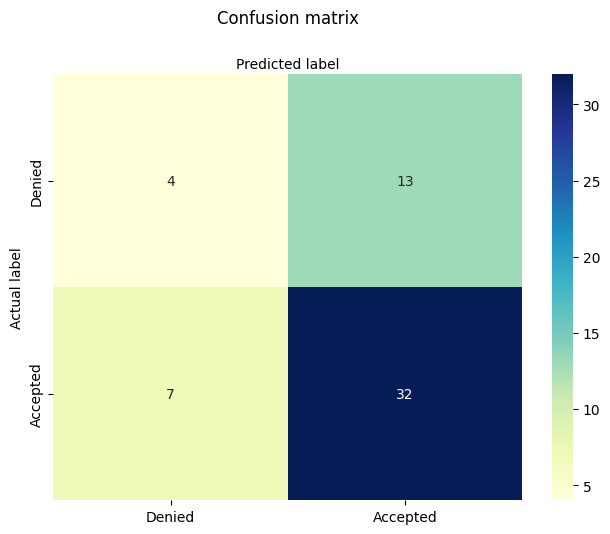

In [69]:
# Performing logistic regression and returning with confusion matrix
confusion_matrix4 = perform_logistic_regression(X_train, y_train, X_test, y_test)

# Plotting confusion matrix
plot_confusion_matrix(confusion_matrix4, neg_label='Denied', pos_label='Accepted')

#   In terms of Lender
# False acceptance could lead to granting loans to applicants who are not creditworthy. This could result in default or financial losses for lender.
# False deny could result in a loss of potential customers who are not creditworthy.

#   In terms of Lendy
# False acceptance could have the applicant in a position to accumulate debt that they can not repay.
# False deny could result in missed oppertunity for financing important purcahses or investments.

Part 5. Adding a penalty parameter

In [70]:
# Adding penalty parameters
C = [50, 20, 10, 1, 0.1, 0.01]

# Reinitializing values from previous normalization
X_train5 = X_train
X_test5 = X_test
y_train5 = y_train3
y_test5 = y_test3

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train5, y_train5)
    print('C:', c)
    print('Training accuracy:\t%5.4f' %clf.score(X_train5, y_train5))
    print('Test accuracy:\t\t%5.4f' %clf.score(X_test5, y_test5))
    print('')

C: 50
Training accuracy:	0.8062
Test accuracy:		0.7321

C: 20
Training accuracy:	0.8062
Test accuracy:		0.7321

C: 10
Training accuracy:	0.8062
Test accuracy:		0.7500

C: 1
Training accuracy:	0.7984
Test accuracy:		0.7857

C: 0.1
Training accuracy:	0.7907
Test accuracy:		0.7857

C: 0.01
Training accuracy:	0.3178
Test accuracy:		0.4464



In [71]:
# Selecting best penalty and continuing the log regression
# Both C: 1 and C: 0.1 are the same ---- Using 1
clf = LogisticRegression(penalty='l1', C=1, solver='liblinear')
clf.fit(X_train5, y_train5)
y_pred = clf.predict(X_test5)

# Find accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y_test5, y_pred))
print("Precision:", metrics.precision_score(y_test5, y_pred))
print("Recall:", metrics.recall_score(y_test5, y_pred))
print("F1 Score:", metrics.f1_score(y_test5, y_pred))

Accuracy: 0.7857142857142857
Precision: 0.7209302325581395
Recall: 1.0
F1 Score: 0.8378378378378378


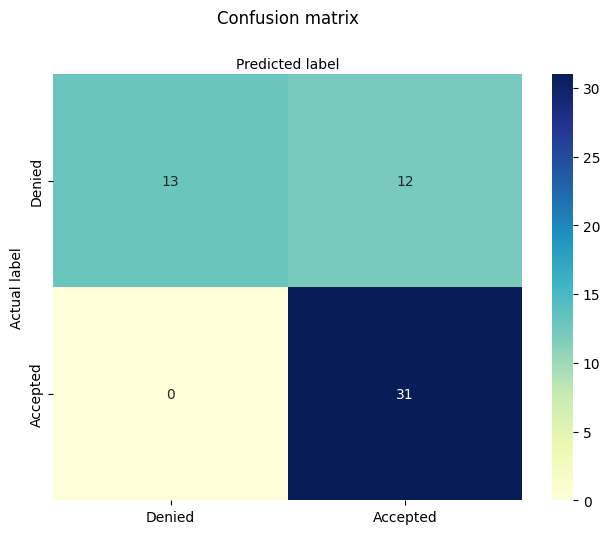

In [72]:
confusion_matrix5 = confusion_matrix(y_test5, y_pred)

# Plotting confusion matrix
plot_confusion_matrix(confusion_matrix5, neg_label='Denied', pos_label='Accepted')

Part 6. Using Naive Bayesian

In [73]:
readline.clear_history()

# Load the dataset
loan = pd.read_csv(file_path)

# Mapping
loan['Loan_Status'] = loan['Loan_Status'].map({'yes': 1, 'no': 0})
loan['Property_Area'] = loan['Property_Area'].map({'Semirural': 2, 'Rural': 1, 'Urban': 0})
loan['Self_Employed'] = loan['Self_Employed'].map({'yes': 1, 'no': 0})
loan['Education'] = loan['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan['Married'] = loan['Married'].map({'yes': 1, 'no': 0})
loan['Gender'] = loan['Gender'].map({'Male': 1, 'Female': 0})

# Cleaning dataset
loan = loan.dropna()
#Resetting index
loan.reset_index(drop=True, inplace=True)

X= loan.drop(columns=['Loan_Status', 'Loano_ID'])
y = loan['Loan_Status']

num_elements = loan.shape[0]
print("Number of elements remaining: ", num_elements) # We lose half of the elements

loan.head()

Number of elements remaining:  185


,Loano_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1,1.0,1,0.0,4583,1508.0,128,360.0,1.0,1.0,0
1,LP001005,1.0,1,0.0,1,1.0,3000,0.0,66,360.0,1.0,0.0,1
2,LP001006,1.0,1,0.0,0,0.0,2583,2358.0,120,360.0,1.0,0.0,1
3,LP001008,1.0,0,0.0,1,0.0,6000,0.0,141,360.0,1.0,0.0,1
4,LP001013,1.0,1,0.0,0,0.0,2333,1516.0,95,360.0,1.0,0.0,1


In [74]:
# Splitting into training and validation sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 200)

# Creating Gaussian classifier
classifier = GaussianNB()
classifier.fit(X_train6, y_train6)
y_pred6 = classifier.predict(X_test6)

In [75]:
# Find accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y_test6, y_pred6))
print("Precision:", metrics.precision_score(y_test6, y_pred6))
print("Recall:", metrics.recall_score(y_test6, y_pred6))
print("F1 Score:", metrics.f1_score(y_test6, y_pred6))

Accuracy: 0.7857142857142857
Precision: 0.7380952380952381
Recall: 0.96875
F1 Score: 0.8378378378378379


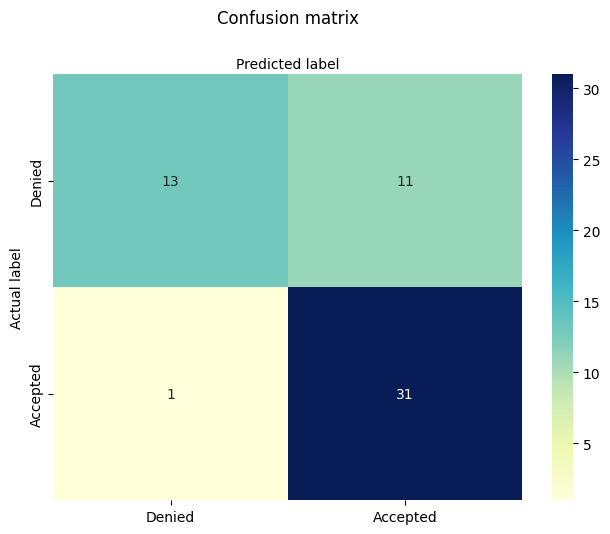

In [76]:
# Find confusion matrix
confusion_matrix_6 = confusion_matrix(y_test6, y_pred6)

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix_6, neg_label='Denied', pos_label='Accepted')

Part 7. Logistic Regression using PCA feature extraction for training

In [77]:
# Load the dataset
loan = pd.read_csv(file_path)

# Mapping
loan['Loan_Status'] = loan['Loan_Status'].map({'yes': 1, 'no': 0})
loan['Property_Area'] = loan['Property_Area'].map({'Semirural': 2, 'Rural': 1, 'Urban': 0})
loan['Self_Employed'] = loan['Self_Employed'].map({'yes': 1, 'no': 0})
loan['Education'] = loan['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan['Married'] = loan['Married'].map({'yes': 1, 'no': 0})
loan['Gender'] = loan['Gender'].map({'Male': 1, 'Female': 0})

# Cleaning dataset
loan = loan.dropna()
#Resetting index
loan.reset_index(drop=True, inplace=True)

X= loan.drop(columns=['Loan_Status', 'Loano_ID'])
y = loan['Loan_Status']

num_elements = loan.shape[0]
print("Number of elements remaining: ", num_elements) # We lose half of the elements

loan.head()

Number of elements remaining:  185


,Loano_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1,1.0,1,0.0,4583,1508.0,128,360.0,1.0,1.0,0
1,LP001005,1.0,1,0.0,1,1.0,3000,0.0,66,360.0,1.0,0.0,1
2,LP001006,1.0,1,0.0,0,0.0,2583,2358.0,120,360.0,1.0,0.0,1
3,LP001008,1.0,0,0.0,1,0.0,6000,0.0,141,360.0,1.0,0.0,1
4,LP001013,1.0,1,0.0,0,0.0,2333,1516.0,95,360.0,1.0,0.0,1


In [78]:
# Perform standardization
X7 = MinMaxScaler().fit_transform(X)

K = 1:
Accuracy: 0.6785714285714286
Precision: 0.6785714285714286
Recall: 1.0
F1 Score: 0.8085106382978724


K = 2:
Accuracy: 0.6785714285714286
Precision: 0.6785714285714286
Recall: 1.0
F1 Score: 0.8085106382978724


K = 3:
Accuracy: 0.6428571428571429
Precision: 0.6956521739130435
Recall: 0.8421052631578947
F1 Score: 0.761904761904762


K = 4:
Accuracy: 0.8035714285714286
Precision: 0.7755102040816326
Recall: 1.0
F1 Score: 0.8735632183908045


K = 5:
Accuracy: 0.8035714285714286
Precision: 0.7755102040816326
Recall: 1.0
F1 Score: 0.8735632183908045


K = 6:
Accuracy: 0.8035714285714286
Precision: 0.7755102040816326
Recall: 1.0
F1 Score: 0.8735632183908045


K = 7:
Accuracy: 0.8035714285714286
Precision: 0.7755102040816326
Recall: 1.0
F1 Score: 0.8735632183908045


K = 8:
Accuracy: 0.8035714285714286
Precision: 0.7755102040816326
Recall: 1.0
F1 Score: 0.8735632183908045


K = 9:
Accuracy: 0.8035714285714286
Precision: 0.7755102040816326
Recall: 1.0
F1 Score: 0.8735632183908045


K = 1

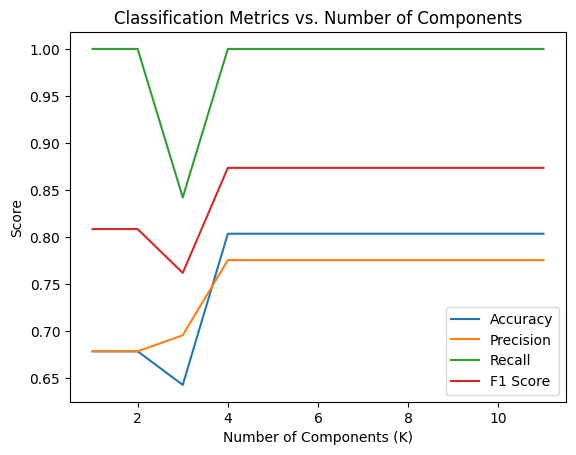

In [79]:
# Select N values from 1 to 11
N = [i for i in range(1, 12)]

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for K in N:
    # Perform PCA
    pca = PCA(n_components=K)
    principalDf = pd.DataFrame(data=pca.fit_transform(X7))

    # Split the data into training and validation sets
    X_train7, X_test7, y_train7, y_test7 = train_test_split(principalDf.values, y, train_size=0.7, test_size=0.3, random_state=70)

    # Perform logistic regression
    classifier = LogisticRegression(random_state=80)
    classifier.fit(X_train7, y_train7)

    # Make predictions and find confusion matrix
    y_pred7 = classifier.predict(X_test7)
    cnf_matrix_7 = confusion_matrix(y_test7, y_pred7)

    # Find accuracy, precision, recall, and F1 score
    accuracy1 = metrics.accuracy_score(y_test7, y_pred7)
    precision1 = metrics.precision_score(y_test7, y_pred7)
    recall1 = metrics.recall_score(y_test7, y_pred7)
    f1_score1 = metrics.f1_score(y_test7, y_pred7)

    # Append metrics to respective lists
    accuracy_list.append(accuracy1)
    precision_list.append(precision1)
    recall_list.append(recall1)
    f1_score_list.append(f1_score1)

    print(f"K = {K}:")
    print("Accuracy:", accuracy1)
    print("Precision:", precision1)
    print("Recall:", recall1)
    print("F1 Score:", f1_score1)
    print('\n')

# Plotting the metrics
plt.plot(N, accuracy_list, label='Accuracy')
plt.plot(N, precision_list, label='Precision')
plt.plot(N, recall_list, label='Recall')
plt.plot(N, f1_score_list, label='F1 Score')

plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.title('Classification Metrics vs. Number of Components')
plt.legend()
plt.show()


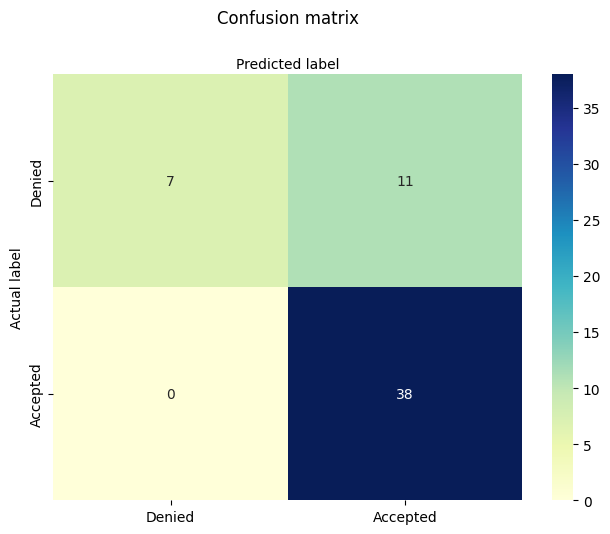

In [80]:
# Plot confusion matrix
plot_confusion_matrix(cnf_matrix_7, neg_label='Denied', pos_label='Accepted')

Part 8. Bayesian classifier using PCA feature extraction for training

In [81]:
# Load the dataset
loan = pd.read_csv(file_path)

# Mapping
loan['Loan_Status'] = loan['Loan_Status'].map({'yes': 1, 'no': 0})
loan['Property_Area'] = loan['Property_Area'].map({'Semirural': 2, 'Rural': 1, 'Urban': 0})
loan['Self_Employed'] = loan['Self_Employed'].map({'yes': 1, 'no': 0})
loan['Education'] = loan['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan['Married'] = loan['Married'].map({'yes': 1, 'no': 0})
loan['Gender'] = loan['Gender'].map({'Male': 1, 'Female': 0})

# Cleaning dataset
loan = loan.dropna()
#Resetting index
loan.reset_index(drop=True, inplace=True)

X= loan.drop(columns=['Loan_Status', 'Loano_ID'])
y = loan['Loan_Status']

num_elements = loan.shape[0]
print("Number of elements remaining: ", num_elements) # We lose half of the elements

loan.head()


Number of elements remaining:  185


,Loano_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1,1.0,1,0.0,4583,1508.0,128,360.0,1.0,1.0,0
1,LP001005,1.0,1,0.0,1,1.0,3000,0.0,66,360.0,1.0,0.0,1
2,LP001006,1.0,1,0.0,0,0.0,2583,2358.0,120,360.0,1.0,0.0,1
3,LP001008,1.0,0,0.0,1,0.0,6000,0.0,141,360.0,1.0,0.0,1
4,LP001013,1.0,1,0.0,0,0.0,2333,1516.0,95,360.0,1.0,0.0,1


In [82]:
# Perform standardization
X8 = MinMaxScaler().fit_transform(X)

K = 1:
Accuracy: 0.6607142857142857
Precision: 0.6607142857142857
Recall: 1.0
F1 Score: 0.7956989247311829


K = 2:
Accuracy: 0.625
Precision: 0.6481481481481481
Recall: 0.9459459459459459
F1 Score: 0.7692307692307693


K = 3:
Accuracy: 0.6607142857142857
Precision: 0.6875
Recall: 0.8918918918918919
F1 Score: 0.7764705882352941


K = 4:
Accuracy: 0.8035714285714286
Precision: 0.7708333333333334
Recall: 1.0
F1 Score: 0.8705882352941177


K = 5:
Accuracy: 0.7857142857142857
Precision: 0.7777777777777778
Recall: 0.9459459459459459
F1 Score: 0.8536585365853658


K = 6:
Accuracy: 0.7857142857142857
Precision: 0.7777777777777778
Recall: 0.9459459459459459
F1 Score: 0.8536585365853658


K = 7:
Accuracy: 0.8035714285714286
Precision: 0.782608695652174
Recall: 0.972972972972973
F1 Score: 0.8674698795180723


K = 8:
Accuracy: 0.8035714285714286
Precision: 0.782608695652174
Recall: 0.972972972972973
F1 Score: 0.8674698795180723


K = 9:
Accuracy: 0.8035714285714286
Precision: 0.782608695652174
Re

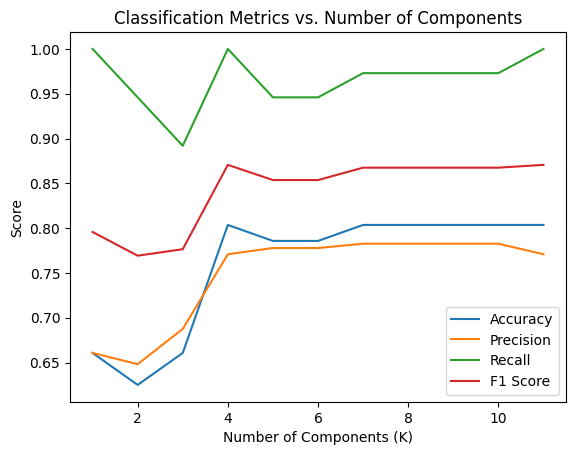

In [83]:
# Select N values from 1 to 11
N = [i for i in range(1, 12)]

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for K in N:
    # Perform PCA
    pca = PCA(n_components=K)
    principalDf = pd.DataFrame(data=pca.fit_transform(X8))

    # Split the data into training and validation sets
    X_train8, X_test8, y_train8, y_test8 = train_test_split(principalDf.values, y, train_size=0.7, test_size=0.3, random_state=80)

    # Perform Gaussian Naive Bayes classification
    classifier = GaussianNB()
    classifier.fit(X_train8, y_train8)

    # Make predictions and find confusion matrix
    y_pred8 = classifier.predict(X_test8)
    cnf_matrix_8 = confusion_matrix(y_test8, y_pred8)

    # Find accuracy, precision, recall, and F1 score
    accuracy = metrics.accuracy_score(y_test8, y_pred8)
    precision = metrics.precision_score(y_test8, y_pred8)
    recall = metrics.recall_score(y_test8, y_pred8)
    f1_score = metrics.f1_score(y_test8, y_pred8)

    # Append metrics to respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

    print(f"K = {K}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print('\n')

# Plotting the metrics
plt.plot(N, accuracy_list, label='Accuracy')
plt.plot(N, precision_list, label='Precision')
plt.plot(N, recall_list, label='Recall')
plt.plot(N, f1_score_list, label='F1 Score')

plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.title('Classification Metrics vs. Number of Components')
plt.legend()
plt.show()


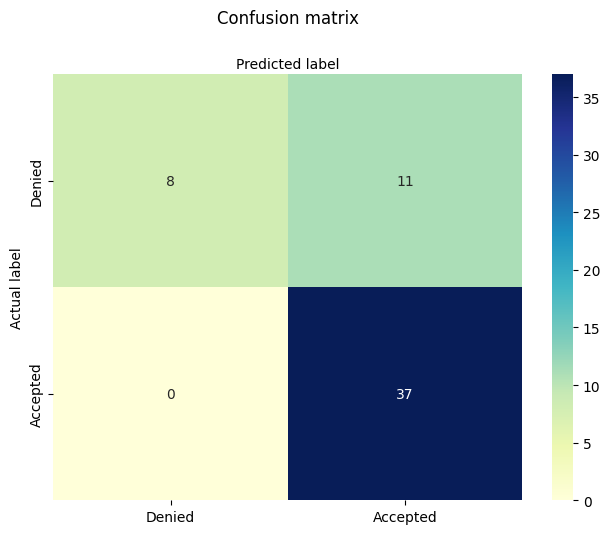

In [84]:
# Plot confusion matrix
plot_confusion_matrix(cnf_matrix_8, neg_label='Denied', pos_label='Accepted')

In [85]:
# Function to collect user input for questionnaire
def get_user_input():
    gender = input("Gender (Male/Female): ").capitalize()
    married = input("Married (Yes/No): ").capitalize()
    dependents = int(input("Number of Dependents: "))
    education = input("Education (Graduate/Not Graduate): ").capitalize()
    self_employed = input("Self Employed (Yes/No): ").capitalize()
    applicant_income = float(input("Applicant Income: "))
    coapplicant_income = float(input("Coapplicant Income: "))
    loan_amount = float(input("Loan Amount: "))
    loan_amount_term = float(input("Loan Amount Term: "))
    credit_history = float(input("Credit History (0 or 1): "))
    property_area = input("Property Area (Semirural/Rural/Urban): ").capitalize()

    return gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area

# Collect user input
gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area = get_user_input()

# Convert user input to numeric values based on mappings
gender = 1 if gender == 'Male' else 0
married = 1 if married == 'Yes' else 0
education = 1 if education == 'Graduate' else 0
self_employed = 1 if self_employed == 'Yes' else 0
property_area = {'Semirural': 2, 'Rural': 1, 'Urban': 0}[property_area]

# Perform PCA on user input
input_data = [[gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area]]
input_data_pca = pca.transform(input_data)

# Predict using Gaussian Naive Bayes classifier
prediction = classifier.predict(input_data_pca)

# Output prediction
print("Loan Approval Prediction:", "Approved" if prediction[0] == 1 else "Denied")

Gender (Male/Female): male
Married (Yes/No): yes
Number of Dependents: 1
Education (Graduate/Not Graduate): graduate
Self Employed (Yes/No): yes
Applicant Income: 100000
Coapplicant Income: 100
Loan Amount: 5000
Loan Amount Term: 360
Credit History (0 or 1): 1
Property Area (Semirural/Rural/Urban): Rural
Loan Approval Prediction: Denied


END